In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/plantvillage/PlantVillage/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 43444 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/plantvillage/PlantVillage/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10861 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[146.5  151.5  155.5 ]
   [148.25 153.25 157.25]
   [150.5  155.5  159.5 ]
   ...
   [129.5  133.5  136.5 ]
   [129.5  133.5  136.5 ]
   [129.5  133.5  136.5 ]]

  [[147.5  152.5  156.5 ]
   [150.5  155.5  159.5 ]
   [151.75 156.75 160.75]
   ...
   [134.   138.   141.  ]
   [134.   138.   141.  ]
   [131.25 135.25 138.25]]

  [[148.75 153.75 157.75]
   [151.25 156.25 160.25]
   [148.75 153.75 157.75]
   ...
   [126.25 130.25 133.25]
   [126.25 130.25 133.25]
   [130.75 134.75 137.75]]

  ...

  [[113.25 113.25 115.25]
   [110.5  110.5  112.5 ]
   [114.75 114.75 116.75]
   ...
   [107.   105.   108.  ]
   [109.5  107.5  110.5 ]
   [103.5  101.5  104.5 ]]

  [[112.5  112.5  114.5 ]
   [118.5  118.5  120.5 ]
   [114.5  114.5  116.5 ]
   ...
   [ 97.75  95.75  98.75]
   [100.75  98.75 101.75]
   [ 97.5   95.5   98.5 ]]

  [[119.5  119.5  121.5 ]
   [118.5  118.5  120.5 ]
   [120.25 120.25 122.25]
   ...
   [100.25  98.25 101.25]
   [104.   102.   105.  ]
   [102.5  100.5  10

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50


I0000 00:00:1725187004.443686     111 service.cc:145] XLA service 0x7b42800021f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725187004.443762     111 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   3/1358 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.0365 - loss: 4.2834   

I0000 00:00:1725187012.806785     111 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1725187012.815887     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4427 - loss: 2.0562

I0000 00:00:1725187090.793987     108 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads



1358/1358 ━━━━━━━━━━━━━━━━━━━━ 108s 71ms/step - accuracy: 0.4428 - loss: 2.0557 - val_accuracy: 0.8232 - val_loss: 0.5588
Epoch 2/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.8122 - loss: 0.5996 - val_accuracy: 0.8884 - val_loss: 0.3443
Epoch 3/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.8886 - loss: 0.3581 - val_accuracy: 0.9188 - val_loss: 0.2474
Epoch 4/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9199 - loss: 0.2468 - val_accuracy: 0.9332 - val_loss: 0.1995
Epoch 5/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9384 - loss: 0.1835 - val_accuracy: 0.9363 - val_loss: 0.2107
Epoch 6/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9554 - loss: 0.1383 - val_accuracy: 0.9363 - val_loss: 0.2032
Epoch 7/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9645 - loss: 0.1130 - val_accuracy: 0.9530 - val_loss: 0.1609
Epoch 8/50
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9711 - loss: 0.0

In [23]:
#Model Evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

1358/1358 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9971 - loss: 0.0097


In [24]:
print(train_loss,train_acc)

0.00839259847998619 0.9974219799041748


In [25]:
#Model Validation set
val_loss,val_acc=model.evaluate(validation_set)

340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9638 - loss: 0.1936


In [26]:
print(val_loss,val_acc)

0.17587365210056305 0.9636313319206238


Saving Model

In [28]:
model.save('trained_model.keras')

In [29]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6128579378128052,
  0.8381364345550537,
  0.8960040807723999,
  0.9247767329216003,
  0.9427999258041382,
  0.9582911133766174,
  0.9651045203208923,
  0.972240149974823,
  0.9767746925354004,
  0.9770278930664062,
  0.9807338118553162,
  0.9825752973556519,
  0.9835190176963806,
  0.9856367111206055,
  0.9871558547019958,
  0.9860510230064392,
  0.9894576668739319,
  0.9894346594810486,
  0.9900791645050049,
  0.9907467365264893,
  0.9899410605430603,
  0.9919896721839905,
  0.9909308552742004,
  0.992841362953186,
  0.9923809766769409,
  0.992404043674469,
  0.9924960732460022,
  0.9925190806388855,
  0.9932096600532532,
  0.994613766670227,
  0.9926802515983582,
  0.9943605661392212,
  0.9939231872558594,
  0.9936930537223816,
  0.9938311576843262,
  0.99530428647995,
  0.9938771724700928,
  0.994705855846405,
  0.9947518706321716,
  0.9942454695701599,
  0.9950050711631775,
  0.9950510859489441,
  0.9960178732872009,
  0.9955114722251892,
  0.9954193830490112,
  0.9

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [32]:
training_history.history['accuracy']

[0.6128579378128052,
 0.8381364345550537,
 0.8960040807723999,
 0.9247767329216003,
 0.9427999258041382,
 0.9582911133766174,
 0.9651045203208923,
 0.972240149974823,
 0.9767746925354004,
 0.9770278930664062,
 0.9807338118553162,
 0.9825752973556519,
 0.9835190176963806,
 0.9856367111206055,
 0.9871558547019958,
 0.9860510230064392,
 0.9894576668739319,
 0.9894346594810486,
 0.9900791645050049,
 0.9907467365264893,
 0.9899410605430603,
 0.9919896721839905,
 0.9909308552742004,
 0.992841362953186,
 0.9923809766769409,
 0.992404043674469,
 0.9924960732460022,
 0.9925190806388855,
 0.9932096600532532,
 0.994613766670227,
 0.9926802515983582,
 0.9943605661392212,
 0.9939231872558594,
 0.9936930537223816,
 0.9938311576843262,
 0.99530428647995,
 0.9938771724700928,
 0.994705855846405,
 0.9947518706321716,
 0.9942454695701599,
 0.9950050711631775,
 0.9950510859489441,
 0.9960178732872009,
 0.9955114722251892,
 0.9954193830490112,
 0.9956725835800171,
 0.9957416653633118,
 0.9954653978347778,

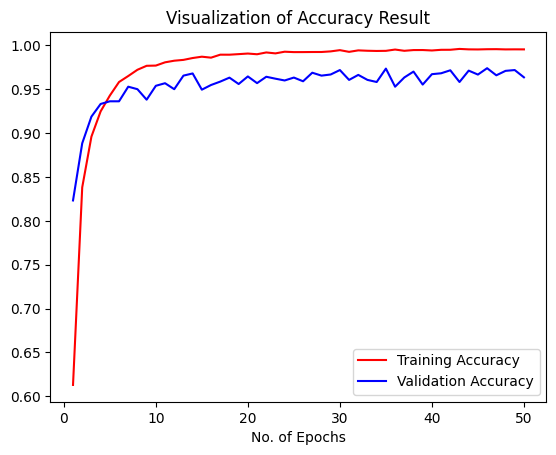

In [33]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/plantvillage/PlantVillage/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10861 files belonging to 38 classes.


In [36]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

340/340 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


(array([[1.0000000e+00, 1.8885054e-12, 6.6751983e-16, ..., 1.0897709e-16,
         3.4742529e-17, 1.1148452e-14],
        [8.6141521e-01, 3.9695852e-10, 6.2203355e-05, ..., 5.6966088e-11,
         5.4323753e-14, 4.7651851e-13],
        [8.5741639e-01, 4.1658772e-04, 3.2484405e-07, ..., 1.4573997e-07,
         2.2157712e-08, 6.8369678e-07],
        ...,
        [3.1651914e-16, 1.9573727e-17, 2.1401321e-16, ..., 2.1829076e-17,
         1.1934234e-16, 1.0000000e+00],
        [4.8440378e-20, 2.6358476e-21, 1.6150543e-18, ..., 1.4482446e-18,
         3.2733027e-21, 1.0000000e+00],
        [1.1254162e-22, 2.4604378e-26, 6.4484102e-24, ..., 2.6002104e-24,
         1.3144549e-23, 1.0000000e+00]], dtype=float32),
 (10861, 38))

In [37]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(10861,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [39]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(10861, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(10861,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.87      0.92       126
                                 Apple___Black_rot       0.98      0.96      0.97       125
                          Apple___Cedar_apple_rust       1.00      0.84      0.91        55
                                   Apple___healthy       0.94      0.94      0.94       329
                               Blueberry___healthy       0.96      0.99      0.98       300
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       210
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.79      0.81       103
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       239
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.93      0.

In [42]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[ 109,    1,    0, ...,    0,    0,    0],
       [   0,  120,    0, ...,    0,    0,    0],
       [   0,    0,   46, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 1070,    0,    0],
       [   0,    0,    0, ...,    0,   71,    0],
       [   0,    0,    0, ...,    0,    0,  317]])

Confusion Matrix

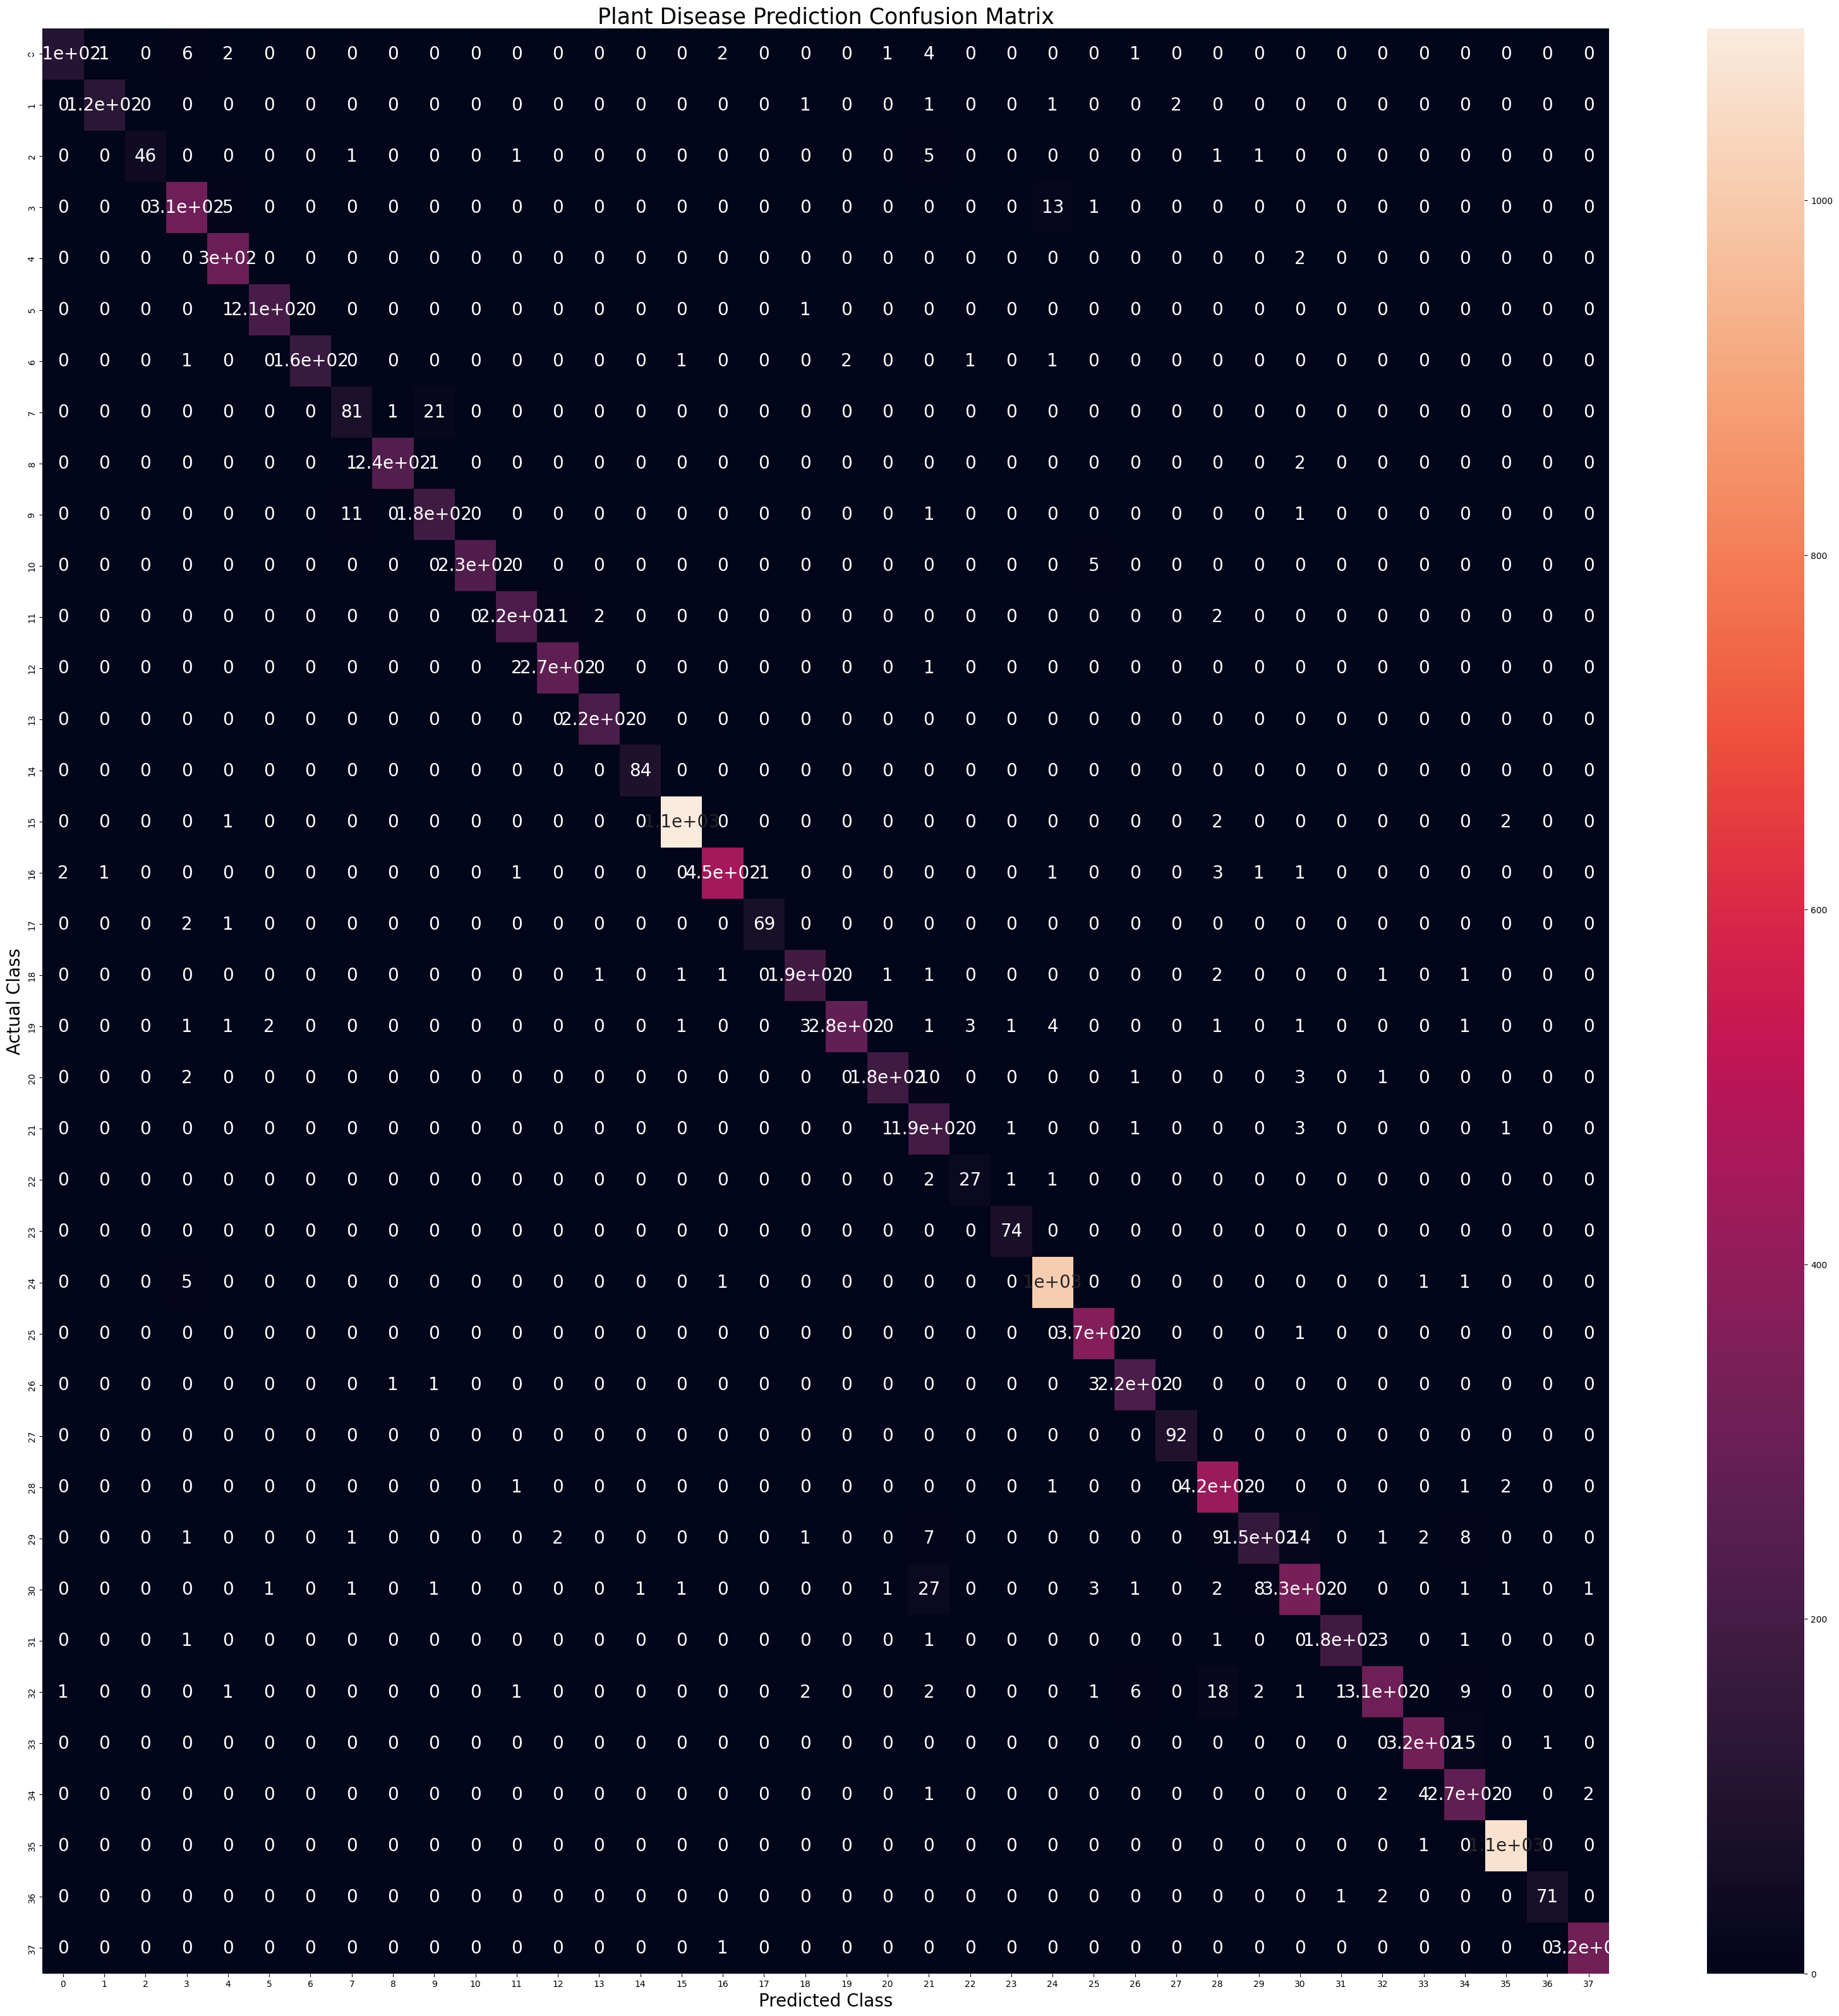

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':20})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()